In [151]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
import time

In [152]:
listings = pd.read_csv('/Users/saurabh/Documents/PythonData/listings 2.csv')

In [153]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,958,https://www.airbnb.com/rooms/958,20180705131954,2018-07-05,"Bright, Modern Garden Unit - 1BR/1B",Our bright garden unit overlooks a grassy back...,"Newly remodeled, modern, and bright garden uni...",Our bright garden unit overlooks a grassy back...,none,*Quiet cul de sac in friendly neighborhood *St...,...,t,STR-0001256,"{""SAN FRANCISCO""}",f,f,moderate,f,f,1,1.310
1,5858,https://www.airbnb.com/rooms/5858,20180705131954,2018-07-05,Creative Sanctuary,NaN,We live in a large Victorian house on a quiet ...,We live in a large Victorian house on a quiet ...,none,I love how our neighborhood feels quiet but is...,...,t,NaN,"{""SAN FRANCISCO""}",f,f,strict_14_with_grace_period,f,f,1,1.000
2,7918,https://www.airbnb.com/rooms/7918,20180705131954,2018-07-05,A Friendly Room - UCSF/USF - San Francisco,Nice and good public transportation. 7 minute...,Room rental-sunny view room/sink/Wi Fi (inner ...,Nice and good public transportation. 7 minute...,none,"Shopping old town, restaurants, McDonald, Whol...",...,t,NaN,"{""SAN FRANCISCO""}",f,f,strict_14_with_grace_period,f,f,7,0.160
3,8014,https://www.airbnb.com/rooms/8014,20180705131954,2018-07-05,Newly Remodeled room in big house WIFI market,Freshly painted newly done laminate floor with...,The room is recently painted in the color of c...,Freshly painted newly done laminate floor with...,none,"The neighborhood is very residential, close to...",...,t,STR-0000974,"{""SAN FRANCISCO""}",t,f,moderate,f,f,2,1.150
4,8142,https://www.airbnb.com/rooms/8142,20180705131954,2018-07-05,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,Room rental Sunny view Rm/Wi-Fi/TV/sink/large ...,Nice and good public transportation. 7 minute...,none,NaN,...,t,NaN,"{""SAN FRANCISCO""}",f,f,strict_14_with_grace_period,f,f,7,0.150


In [154]:
listings_temp = listings

In [155]:
listings_temp['price']= listings_temp['price'].map(lambda x: str(x)[1:].replace(',',''))

In [156]:
listings_temp['price'].head()

0    170.00
1    235.00
2     65.00
3     63.00
4     65.00
Name: price, dtype: object

In [157]:
listings_temp = listings_temp.drop(['id', 'listing_url','thumbnail_url','medium_url','picture_url','xl_picture_url','neighbourhood_group_cleansed','host_acceptance_rate'], axis=1)

In [158]:
listings_temp.columns

Index(['scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description',
       'experiences_offered', 'neighborhood_overview', 'notes', 'transit',
       'access', 'interaction', 'house_rules', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed', 'city', 'state',
       'zipcode', 'market', 'smart_location', 'country_code', 'country',
       'latitude', 'longitude', 'is_location_exact', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price',
       'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_i

In [159]:
listings_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4693 entries, 0 to 4692
Data columns (total 88 columns):
scrape_id                           4693 non-null int64
last_scraped                        4693 non-null object
name                                4693 non-null object
summary                             4544 non-null object
space                               4094 non-null object
description                         4686 non-null object
experiences_offered                 4693 non-null object
neighborhood_overview               3642 non-null object
notes                               3104 non-null object
transit                             3720 non-null object
access                              3687 non-null object
interaction                         3534 non-null object
house_rules                         3763 non-null object
host_id                             4693 non-null int64
host_url                            4693 non-null object
host_name                           4693

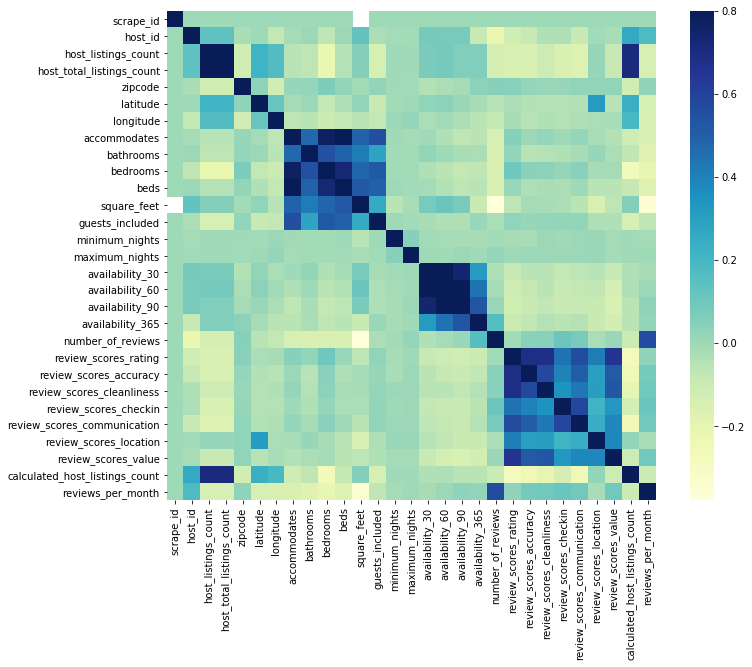

In [160]:
corrmat = listings_temp.corr()
# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True, cmap="YlGnBu")
plt.show()

The above graph shows number_of_reviews and reviews_per_month are correlated 

In [161]:
df = listings_temp[['price','room_type','neighbourhood','review_scores_cleanliness','review_scores_value','minimum_nights','availability_365','number_of_reviews','bedrooms','calculated_host_listings_count','maximum_nights','square_feet','review_scores_location']].copy()


In [162]:
df.info()
df_new = df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4693 entries, 0 to 4692
Data columns (total 13 columns):
price                             4693 non-null object
room_type                         4693 non-null object
neighbourhood                     4528 non-null object
review_scores_cleanliness         4388 non-null float64
review_scores_value               4385 non-null float64
minimum_nights                    4693 non-null int64
availability_365                  4693 non-null int64
number_of_reviews                 4693 non-null int64
bedrooms                          4693 non-null int64
calculated_host_listings_count    4693 non-null int64
maximum_nights                    4693 non-null int64
square_feet                       110 non-null float64
review_scores_location            4386 non-null float64
dtypes: float64(4), int64(6), object(3)
memory usage: 476.7+ KB


In [163]:
df_new['price'] = df_new['price'].astype(np.float64)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [164]:
cat_list = ['room_type','neighbourhood']
for col in cat_list:
    df_new[col] = df_new[col].astype('category') #type coersion to category categorical data dypte

   
df_cat = df_new[cat_list].apply(lambda x: x.cat.codes) #makes it numbers

for col in cat_list:
    df_cat[col] = df_cat[col].astype('category') #type coersion to category categorical data dypte



/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [165]:
df_new = df_new.drop(cat_list, axis=1)

In [166]:
df_temp = pd.concat([df_new, df_cat], axis =1) #pd.get_dummies(df_new)

In [167]:
df_temp = pd.get_dummies(df_temp)

In [168]:
df_temp.head()

,price,review_scores_cleanliness,review_scores_value,minimum_nights,availability_365,number_of_reviews,bedrooms,calculated_host_listings_count,maximum_nights,square_feet,...,neighbourhood_19,neighbourhood_20,neighbourhood_21,neighbourhood_22,neighbourhood_23,neighbourhood_24,neighbourhood_25,neighbourhood_26,neighbourhood_27,neighbourhood_28
19,225.000,10.000,9.000,1,119,91,2,1,30,1000.000,...,0,0,0,0,0,0,0,0,0,0
21,155.000,10.000,10.000,3,271,319,1,1,14,300.000,...,0,0,0,0,0,0,0,1,0,0
31,393.000,8.000,9.000,2,1,26,4,1,30,1850.000,...,0,0,0,0,0,0,0,0,0,0
32,175.000,10.000,10.000,30,94,129,1,1,1125,800.000,...,0,0,0,0,0,0,0,1,0,0
33,199.000,10.000,9.000,1,5,23,1,2,29,2200.000,...,0,0,0,0,0,0,0,0,0,0


In [169]:
df_temp = df_temp[df_temp["price"] < 400]

In [170]:
df_temp.head()

,price,review_scores_cleanliness,review_scores_value,minimum_nights,availability_365,number_of_reviews,bedrooms,calculated_host_listings_count,maximum_nights,square_feet,...,neighbourhood_19,neighbourhood_20,neighbourhood_21,neighbourhood_22,neighbourhood_23,neighbourhood_24,neighbourhood_25,neighbourhood_26,neighbourhood_27,neighbourhood_28
19,225.000,10.000,9.000,1,119,91,2,1,30,1000.000,...,0,0,0,0,0,0,0,0,0,0
21,155.000,10.000,10.000,3,271,319,1,1,14,300.000,...,0,0,0,0,0,0,0,1,0,0
31,393.000,8.000,9.000,2,1,26,4,1,30,1850.000,...,0,0,0,0,0,0,0,0,0,0
32,175.000,10.000,10.000,30,94,129,1,1,1125,800.000,...,0,0,0,0,0,0,0,1,0,0
33,199.000,10.000,9.000,1,5,23,1,2,29,2200.000,...,0,0,0,0,0,0,0,0,0,0


In [171]:
df_temp.info()    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 19 to 843
Data columns (total 42 columns):
price                             90 non-null float64
review_scores_cleanliness         90 non-null float64
review_scores_value               90 non-null float64
minimum_nights                    90 non-null int64
availability_365                  90 non-null int64
number_of_reviews                 90 non-null int64
bedrooms                          90 non-null int64
calculated_host_listings_count    90 non-null int64
maximum_nights                    90 non-null int64
square_feet                       90 non-null float64
review_scores_location            90 non-null float64
room_type_0                       90 non-null uint8
room_type_1                       90 non-null uint8
neighbourhood_0                   90 non-null uint8
neighbourhood_1                   90 non-null uint8
neighbourhood_2                   90 non-null uint8
neighbourhood_3                   90 non-null uint8
n

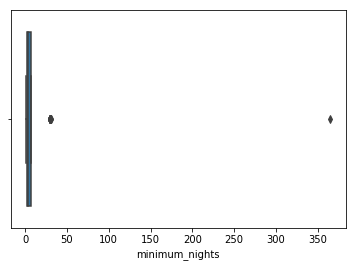

In [172]:
ax = sns.boxplot(x=df_temp["minimum_nights"])

In [173]:
print(np.argmax(df_temp["minimum_nights"]))

154


/usr/local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


(0, 500)

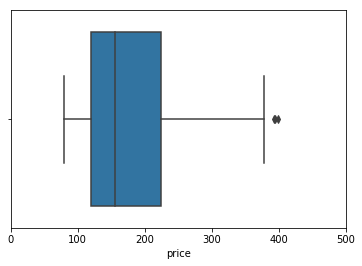

In [174]:
ax = sns.boxplot(x=df_temp["price"])
plt.xlim(0, 500)

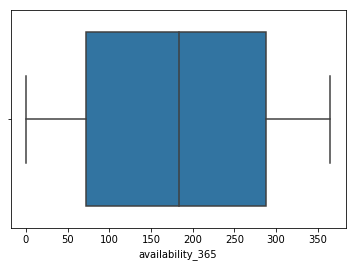

In [175]:
ax = sns.boxplot(x=df_temp["availability_365"])

In [176]:
linear_formula = "price ~ " + " + ".join(set(df_temp.columns) - set(["price"]))

In [177]:
#linear_formula = 'price ~ room_type + neighbourhood + minimum_nights + availability_365 + number_of_reviews + bedrooms'
lm = smf.ols(formula= linear_formula, data=df_temp).fit()
lm.summary()

/usr/local/lib/python3.6/site-packages/statsmodels/base/model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/usr/local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     7.848
Date:                Sun, 05 Aug 2018   Prob (F-statistic):           2.19e-11
Time:                        06:43:16   Log-Likelihood:                -443.59
No. Observations:                  90   AIC:                             963.2
Df Residuals:                      52   BIC:                             1058.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                        105.8219    121.375      0.872      0.387    -137.734     349.378
room_type_0                       63.0678     58.751      1.073      0.288     -54.824     180.959
neighbourhood_3                   43.6669     46.453      0.940      0.352     -49.548     136.882
neighbourhood_28                  57.2147     46.884      1.220      0.228     -36.865     151.295
neighbourhood_14                -204.9062     49.846     -4.111      0.000    -304.930    -104.883
neighbourhood_12                  67.4459     48.175      1.400      0.167     -29.223     164.115
calculated_host_listings_count    -2.2975      6.699     -0.343      0.733     -15.740      11.145
neighbourhood_25                  71.5742     34.480      2.076      0.043       2.386     140.762
neighbourhood_26                  41.3001     20.344      2.030      0.047       0.477      82.124
neighbourhood_10                 -23.3066     32.002     -0.728      0.470     -87.524      40.910
neighbourhood_13                  -2.8233     16.236     -0.174      0.863     -35.403      29.757
neighbourhood_27                 -28.2915    131.704     -0.215      0.831    -292.575     235.992
neighbourhood_6                  160.7116     46.912      3.426      0.001      66.577     254.847
neighbourhood_9                   42.8566     34.235      1.252      0.216     -25.840     111.554
neighbourhood_21                  24.3701     19.887      1.225      0.226     -15.536      64.277
maximum_nights                     0.0048      0.006      0.828      0.411      -0.007       0.017
square_feet                        0.0206      0.010      2.068      0.044       0.001       0.041
neighbourhood_4                   -4.2700     35.661     -0.120      0.905     -75.828      67.288
neighbourhood_18                  30.3362     29.027      1.045      0.301     -27.910      88.582
room_type_1                       42.7541     63.438      0.674      0.503     -84.544     170.052
neighbourhood_0                  -12.3064     53.722     -0.229      0.820    -120.107      95.494
neighbourhood_2                  -18.5403     17.024     -1.089      0.281     -52.702      15.622
minimum_nights                     0.0313      0.188      0.167      0.868      -0.345       0.408
neighbourhood_17                  26.9821     25.248      1.069      0.290     -23.681      77.645
number_of_reviews                 -0.1082      0.073     -1.477      0.146      -0.255       0.039
neighbourhood_8                 6.132e-14   2.45e-14      2.503      0.016    1.22e-14     1.1e-13
neighbourhood_20                  40.8330     24.037      1.699      0.095      -7.401      89.067
review_scores_cleanliness         15.9673     14.578      1.095      0.278     -13.286      45.221
bedrooms      

In [178]:
X = df_temp.drop('price', 1)
y = df_temp['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [179]:
knn = neighbors.KNeighborsRegressor(n_neighbors= 9)
score = cross_val_score(knn, X_train, y_train, cv=5)
print(score)

[ 0.4848116   0.16831734 -0.20520272  0.00155906  0.22242439]


In [180]:
knn_w = neighbors.KNeighborsRegressor(n_neighbors= 5,  weights= 'distance')
score = cross_val_score(knn, X_train, y_train, cv=5)
print(score)

[ 0.4848116   0.16831734 -0.20520272  0.00155906  0.22242439]


After analysing performances of both a KNN Regression and an OLS regression we can conlcude that OLS regression is out performed here with r2 value 0.84 which is good compared to KNN regression which gave score of max 0.48.
Here I find OLS is unambiguously better than KNN
Choice of important feature and removing outliers from data can cause the better model to outperform the weaker model